<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# more imports

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
import scipy.stats as stats
import statsmodels.api as sm



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

<font color='green'>
    
# Q1:

# (A) THIS PART IS A LONG EDA...

</font>

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')
house_original = pd.read_csv('./housing.csv')

In [4]:
house.shape

(1460, 81)

In [5]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
house.info()
# consider dropping some of them if not required... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Identifying if a column is fixed or variable

My aim is to look through each column and see whether the feature is (a) Fixed or (b) Variable or (c) Not Relevant (will drop). 

In [7]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# adding an f in front of features that are fixed and v for features that are not fixed and dropping those that are not relevant
# doing it 20 eachtime by eyeballing the columns

house.iloc[0:10,:20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939


In [9]:
# dropping Id column

print("shape before drop is,{}".format(house.shape))
house.drop('Id', axis = 1, inplace = True)
print("shape after drop is,{}".format(house.shape))

shape before drop is,(1460, 81)
shape after drop is,(1460, 80)


In [10]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
# adding an 'f_' to a feature to denotate a fixed feature and 'v_' for variable / renovatable features
# 'a_' area area fixed features that are used to calculate the total area for the house

new_cols = ['f_MSSubClass', 'f_MSZoning', 'f_LotFrontage', 'f_LotArea', 'f_Street', 'f_Alley',
       'f_LotShape', 'f_LandContour', 'f_Utilities', 'f_LotConfig', 'f_LandSlope',
       'f_Neighborhood', 'f_Condition1', 'f_Condition2', 'f_BldgType', 'f_HouseStyle',
       'v_OverallQual', 'v_OverallCond', 'f_YearBuilt', 'f_YearRemodAdd', 'v_RoofStyle',
       'v_RoofMatl', 'v_Exterior1st', 'v_Exterior2nd', 'f_MasVnrType', 'f_MasVnrArea',
       'v_ExterQual', 'v_ExterCond', 'f_Foundation', 'v_BsmtQual', 'v_BsmtCond',
       'v_BsmtExposure', 'v_BsmtFinType1', 'f_BsmtFinSF1', 'v_BsmtFinType2',
       'f_BsmtFinSF2', 'f_BsmtUnfSF', 'a_TotalBsmtSF', 'v_Heating', 'v_HeatingQC',
       'v_CentralAir', 'v_Electrical', 'a_1stFlrSF', 'a_2ndFlrSF', 'v_LowQualFinSF',
       'f_GrLivArea', 'v_BsmtFullBath', 'v_BsmtHalfBath', 'v_FullBath', 'v_HalfBath',
       'f_BedroomAbvGr', 'f_KitchenAbvGr', 'v_KitchenQual', 'f_TotRmsAbvGrd',
       'v_Functional', 'f_Fireplaces', 'v_FireplaceQu', 'v_GarageType', 'f_GarageYrBlt',
       'v_GarageFinish', 'v_GarageCars', 'f_GarageArea', 'v_GarageQual', 'v_GarageCond',
       'v_PavedDrive', 'f_WoodDeckSF', 'f_OpenPorchSF', 'f_EnclosedPorch', 'f_3SsnPorch',
       'f_ScreenPorch', 'f_PoolArea', 'v_PoolQC', 'v_Fence', 'v_MiscFeature', 'v_MiscVal',
       'f_MoSold', 'f_YrSold', 'f_SaleType', 'f_SaleCondition', 'SalePrice']

# replacing columns

house.columns = new_cols

In [12]:
print("There are {} fixed features".format(len([c for c in new_cols if "f_" in c])))
print("There are {} renovatable features".format(len([c for c in new_cols if "v_" in c])))
print("There are {} area features".format(len([c for c in new_cols if "a_" in c])))

There are 41 fixed features
There are 35 renovatable features
There are 3 area features


In [13]:
# Adding total sqfootage feature 
house["a_totalSF"] = house['a_TotalBsmtSF'] + house['a_1stFlrSF'] + house['a_2ndFlrSF']

In [14]:
# lets deal with the null values first 40 columns first

print(house.iloc[:,0:40].isnull().sum())

f_MSSubClass         0
f_MSZoning           0
f_LotFrontage      259
f_LotArea            0
f_Street             0
f_Alley           1369
f_LotShape           0
f_LandContour        0
f_Utilities          0
f_LotConfig          0
f_LandSlope          0
f_Neighborhood       0
f_Condition1         0
f_Condition2         0
f_BldgType           0
f_HouseStyle         0
v_OverallQual        0
v_OverallCond        0
f_YearBuilt          0
f_YearRemodAdd       0
v_RoofStyle          0
v_RoofMatl           0
v_Exterior1st        0
v_Exterior2nd        0
f_MasVnrType         8
f_MasVnrArea         8
v_ExterQual          0
v_ExterCond          0
f_Foundation         0
v_BsmtQual          37
v_BsmtCond          37
v_BsmtExposure      38
v_BsmtFinType1      37
f_BsmtFinSF1         0
v_BsmtFinType2      38
f_BsmtFinSF2         0
f_BsmtUnfSF          0
a_TotalBsmtSF        0
v_Heating            0
v_HeatingQC          0
dtype: int64


In [15]:
#LotFrontage NaN values can be replaced by the mean for based on the neighbourhood

#create a dataframe where the Lotfrontage mean is calculated by neighbourhood
mean_LotFrontage = house.groupby(['f_Neighborhood'])[['f_Neighborhood','f_LotFrontage']].mean()

#replace house dataframe with mean entries
for i, row in house.iterrows():
    if np.isnan(row['f_LotFrontage']) == True:
        house.loc[i,'f_LotFrontage'] = mean_LotFrontage.loc[row['f_Neighborhood'],'f_LotFrontage']
print(house['f_LotFrontage'].isnull().sum())

0


In [16]:
# Changing my mull values for Alley to "None" so that when I get dummies, I don't miss the null values
house["f_Alley"] = house["f_Alley"].fillna("None")
print(house['f_Alley'].isnull().sum())

0


In [17]:
# Same for "MasVnrType: Masonry veneer type"
house["f_MasVnrType"] = house["f_MasVnrType"].fillna("None")
print(house['f_MasVnrType'].isnull().sum())

0


In [18]:
# Same for "MasVnrArea: Masonry veneer area in square feet"
house["f_MasVnrArea"] = house["f_MasVnrArea"].fillna(0)
print(house['f_MasVnrArea'].isnull().sum())
# house["f_MasVnrArea"].dtypes is float

0


In [19]:
# all the basement null values to correct
print(house.iloc[:,20:60].isnull().sum())

v_RoofStyle         0
v_RoofMatl          0
v_Exterior1st       0
v_Exterior2nd       0
f_MasVnrType        0
f_MasVnrArea        0
v_ExterQual         0
v_ExterCond         0
f_Foundation        0
v_BsmtQual         37
v_BsmtCond         37
v_BsmtExposure     38
v_BsmtFinType1     37
f_BsmtFinSF1        0
v_BsmtFinType2     38
f_BsmtFinSF2        0
f_BsmtUnfSF         0
a_TotalBsmtSF       0
v_Heating           0
v_HeatingQC         0
v_CentralAir        0
v_Electrical        1
a_1stFlrSF          0
a_2ndFlrSF          0
v_LowQualFinSF      0
f_GrLivArea         0
v_BsmtFullBath      0
v_BsmtHalfBath      0
v_FullBath          0
v_HalfBath          0
f_BedroomAbvGr      0
f_KitchenAbvGr      0
v_KitchenQual       0
f_TotRmsAbvGrd      0
v_Functional        0
f_Fireplaces        0
v_FireplaceQu     690
v_GarageType       81
f_GarageYrBlt      81
v_GarageFinish     81
dtype: int64


In [20]:
# check the basement stuff by rows, looks like all these houses don't have basements hence 0 across the rows
house[house['v_BsmtCond'].isnull()][['f_BsmtFinSF1', 'f_BsmtFinSF2', 'f_BsmtUnfSF','a_TotalBsmtSF', 'v_BsmtFullBath', 'v_BsmtHalfBath']]

,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,a_TotalBsmtSF,v_BsmtFullBath,v_BsmtHalfBath
17,0,0,0,0,0,0
39,0,0,0,0,0,0
90,0,0,0,0,0,0
102,0,0,0,0,0,0
156,0,0,0,0,0,0
182,0,0,0,0,0,0
259,0,0,0,0,0,0
342,0,0,0,0,0,0
362,0,0,0,0,0,0
371,0,0,0,0,0,0


In [21]:
# Change them to 0 

cols = ['f_BsmtFinSF1', 'f_BsmtFinSF2', 'f_BsmtUnfSF','a_TotalBsmtSF', 'v_BsmtFullBath', 'v_BsmtHalfBath']
for col in cols:
    house[col] = house[col].fillna(0)
    print(house[col].isnull().sum())

0
0
0
0
0
0


In [22]:
# same as above, eyeballing the basement null values
cols = ['v_BsmtQual', 'v_BsmtCond', 'v_BsmtExposure', 'v_BsmtFinType1', 'v_BsmtFinType2']
house[house['v_BsmtQual'].isnull()][cols]

,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,v_BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [23]:
# Change them to "None"

for col in cols:
    house[col] = house[col].fillna("None")
    print(house[col].isnull().sum())

0
0
0
0
0


In [24]:
# Same for the other basement stuff change them to 'None'

house["f_MasVnrArea"] = house["f_MasVnrArea"].fillna(0)
print(house['f_MasVnrArea'].isnull().sum())

# house["f_MasVnrArea"].dtypes is float

0


In [25]:
# Electrical only one null value, just going to change it to the most common value - "SBrkr". 
house["v_Electrical"] = house["v_Electrical"].fillna("SBrkr")
print(house['v_Electrical'].value_counts())
print(house['v_Electrical'].isnull().sum())

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: v_Electrical, dtype: int64
0


In [26]:
# FireplaceQu: Fireplace quality ties with fireplace 0 counts (when checking using below)
print(house['f_Fireplaces'].value_counts())
house["v_FireplaceQu"] = house["v_FireplaceQu"].fillna("None")
print(house['v_FireplaceQu'].isnull().sum())

0    690
1    650
2    115
3      5
Name: f_Fireplaces, dtype: int64
0


In [27]:
# check for garages, likely the same as basement, some has some don't have garages. Eyeball check again

cols = ['v_GarageType', 'f_GarageYrBlt', 'v_GarageFinish', 'v_GarageQual', 'v_GarageCond']
house[house['v_GarageType'].isnull()][cols].head()

,v_GarageType,f_GarageYrBlt,v_GarageFinish,v_GarageQual,v_GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN


In [28]:
# replace them 
for col in cols:
    house[col] = house[col].fillna("None")
    print(house[col].isnull().sum())

0
0
0
0
0


In [29]:
# Last 3 variables 'v_PoolQC', 'v_Fence', 'v_MiscFeature'

house["v_PoolQC"] = house["v_PoolQC"].fillna("None")
print(house['v_PoolQC'].isnull().sum())

house["v_Fence"] = house["v_Fence"].fillna("None")
print(house['v_Fence'].isnull().sum())

house["v_MiscFeature"] = house["v_MiscFeature"].fillna("None")
print(house['v_MiscFeature'].isnull().sum())

0
0
0


In [30]:
# check for the types for each column to see if they make sense... 20 each time...

print(house.iloc[:10,:20].info())
house.iloc[:10,:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
f_MSSubClass      10 non-null int64
f_MSZoning        10 non-null object
f_LotFrontage     10 non-null float64
f_LotArea         10 non-null int64
f_Street          10 non-null object
f_Alley           10 non-null object
f_LotShape        10 non-null object
f_LandContour     10 non-null object
f_Utilities       10 non-null object
f_LotConfig       10 non-null object
f_LandSlope       10 non-null object
f_Neighborhood    10 non-null object
f_Condition1      10 non-null object
f_Condition2      10 non-null object
f_BldgType        10 non-null object
f_HouseStyle      10 non-null object
v_OverallQual     10 non-null int64
v_OverallCond     10 non-null int64
f_YearBuilt       10 non-null int64
f_YearRemodAdd    10 non-null int64
dtypes: float64(1), int64(6), object(13)
memory usage: 1.6+ KB
None


,f_MSSubClass,f_MSZoning,f_LotFrontage,f_LotArea,f_Street,f_Alley,f_LotShape,f_LandContour,f_Utilities,f_LotConfig,f_LandSlope,f_Neighborhood,f_Condition1,f_Condition2,f_BldgType,f_HouseStyle,v_OverallQual,v_OverallCond,f_YearBuilt,f_YearRemodAdd
0,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
1,20,RL,80.000000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
2,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,70,RL,60.000000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
4,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000
5,50,RL,85.000000,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995
6,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005
7,60,RL,81.288889,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973
8,50,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950
9,190,RL,50.000000,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950


In [31]:
house['f_MSSubClass'] = house['f_MSSubClass'].astype(str)

# first 20 columns only need to change this column 

In [32]:
print(house.iloc[:10,20:40].info())
house.iloc[:10,20:40]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
v_RoofStyle       10 non-null object
v_RoofMatl        10 non-null object
v_Exterior1st     10 non-null object
v_Exterior2nd     10 non-null object
f_MasVnrType      10 non-null object
f_MasVnrArea      10 non-null float64
v_ExterQual       10 non-null object
v_ExterCond       10 non-null object
f_Foundation      10 non-null object
v_BsmtQual        10 non-null object
v_BsmtCond        10 non-null object
v_BsmtExposure    10 non-null object
v_BsmtFinType1    10 non-null object
f_BsmtFinSF1      10 non-null int64
v_BsmtFinType2    10 non-null object
f_BsmtFinSF2      10 non-null int64
f_BsmtUnfSF       10 non-null int64
a_TotalBsmtSF     10 non-null int64
v_Heating         10 non-null object
v_HeatingQC       10 non-null object
dtypes: float64(1), int64(4), object(15)
memory usage: 1.6+ KB
None


,v_RoofStyle,v_RoofMatl,v_Exterior1st,v_Exterior2nd,f_MasVnrType,f_MasVnrArea,v_ExterQual,v_ExterCond,f_Foundation,v_BsmtQual,v_BsmtCond,v_BsmtExposure,v_BsmtFinType1,f_BsmtFinSF1,v_BsmtFinType2,f_BsmtFinSF2,f_BsmtUnfSF,a_TotalBsmtSF,v_Heating,v_HeatingQC
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex
1,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex
3,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex
5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex
6,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex
7,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex
8,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd
9,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex


In [33]:
# no issues for these, next 20 columns

In [34]:
print(house.iloc[:10,40:60].info())
house.iloc[:10,40:60]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
v_CentralAir      10 non-null object
v_Electrical      10 non-null object
a_1stFlrSF        10 non-null int64
a_2ndFlrSF        10 non-null int64
v_LowQualFinSF    10 non-null int64
f_GrLivArea       10 non-null int64
v_BsmtFullBath    10 non-null int64
v_BsmtHalfBath    10 non-null int64
v_FullBath        10 non-null int64
v_HalfBath        10 non-null int64
f_BedroomAbvGr    10 non-null int64
f_KitchenAbvGr    10 non-null int64
v_KitchenQual     10 non-null object
f_TotRmsAbvGrd    10 non-null int64
v_Functional      10 non-null object
f_Fireplaces      10 non-null int64
v_FireplaceQu     10 non-null object
v_GarageType      10 non-null object
f_GarageYrBlt     10 non-null object
v_GarageFinish    10 non-null object
dtypes: int64(12), object(8)
memory usage: 1.6+ KB
None


,v_CentralAir,v_Electrical,a_1stFlrSF,a_2ndFlrSF,v_LowQualFinSF,f_GrLivArea,v_BsmtFullBath,v_BsmtHalfBath,v_FullBath,v_HalfBath,f_BedroomAbvGr,f_KitchenAbvGr,v_KitchenQual,f_TotRmsAbvGrd,v_Functional,f_Fireplaces,v_FireplaceQu,v_GarageType,f_GarageYrBlt,v_GarageFinish
0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn
1,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn
2,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn
3,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf
4,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn
5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993,Unf
6,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn
7,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn
8,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf
9,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn


In [35]:
# no issues for these, next 20 columns

# Note GarageYrBlt ideally should be numeric but significant number of houses without garage

In [36]:
print(house.iloc[:10,60:75].info())
house.iloc[:10,60:75]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
v_GarageCars       10 non-null int64
f_GarageArea       10 non-null int64
v_GarageQual       10 non-null object
v_GarageCond       10 non-null object
v_PavedDrive       10 non-null object
f_WoodDeckSF       10 non-null int64
f_OpenPorchSF      10 non-null int64
f_EnclosedPorch    10 non-null int64
f_3SsnPorch        10 non-null int64
f_ScreenPorch      10 non-null int64
f_PoolArea         10 non-null int64
v_PoolQC           10 non-null object
v_Fence            10 non-null object
v_MiscFeature      10 non-null object
v_MiscVal          10 non-null int64
dtypes: int64(9), object(6)
memory usage: 1.2+ KB
None


,v_GarageCars,f_GarageArea,v_GarageQual,v_GarageCond,v_PavedDrive,f_WoodDeckSF,f_OpenPorchSF,f_EnclosedPorch,f_3SsnPorch,f_ScreenPorch,f_PoolArea,v_PoolQC,v_Fence,v_MiscFeature,v_MiscVal
0,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0
1,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0
2,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0
3,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0
4,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0
5,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700
6,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0
7,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350
8,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0
9,1,205,Gd,TA,Y,0,4,0,0,0,0,None,None,None,0


In [37]:
# no issues for these, next 20 columns

print(house.iloc[:10,75:].info())
house.iloc[:10,75:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
f_MoSold           10 non-null int64
f_YrSold           10 non-null int64
f_SaleType         10 non-null object
f_SaleCondition    10 non-null object
SalePrice          10 non-null int64
a_totalSF          10 non-null int64
dtypes: int64(4), object(2)
memory usage: 560.0+ bytes
None


,f_MoSold,f_YrSold,f_SaleType,f_SaleCondition,SalePrice,a_totalSF
0,2,2008,WD,Normal,208500,2566
1,5,2007,WD,Normal,181500,2524
2,9,2008,WD,Normal,223500,2706
3,2,2006,WD,Abnorml,140000,2473
4,12,2008,WD,Normal,250000,3343
5,10,2009,WD,Normal,143000,2158
6,8,2007,WD,Normal,307000,3380
7,11,2009,WD,Normal,200000,3197
8,4,2008,WD,Abnorml,129900,2726
9,1,2008,WD,Normal,118000,2068


# lets try to find outliers... 


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


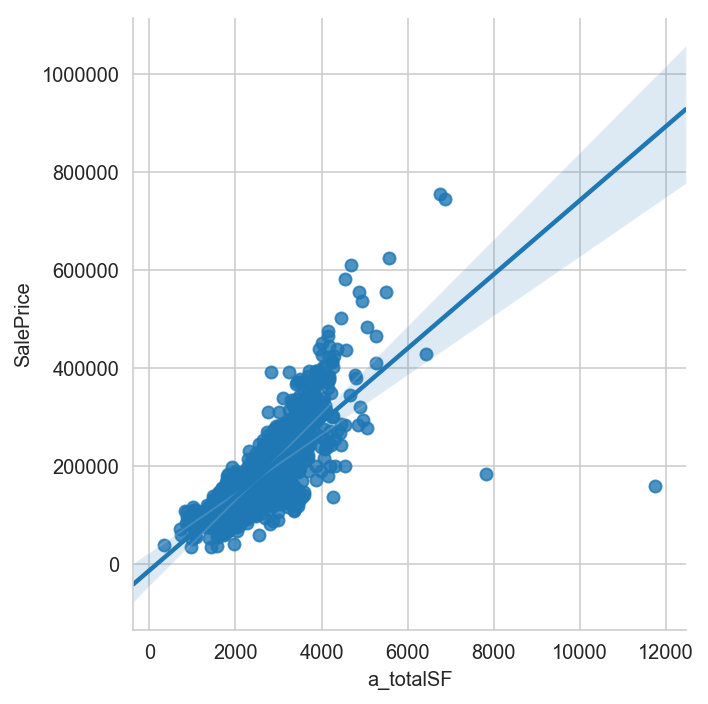

In [38]:
sns.lmplot(x='a_totalSF', y='SalePrice', data=house)
plt.show()

In [39]:
# 2 points look pretty weird... lets find those and drop them and create a new dataframe

print(house[house['a_totalSF']>7800].index)
house2 = house.drop([523,1298], axis = 0)

print(house2[house2['a_totalSF']>7800].index)

Int64Index([523, 1298], dtype='int64')
Int64Index([], dtype='int64')


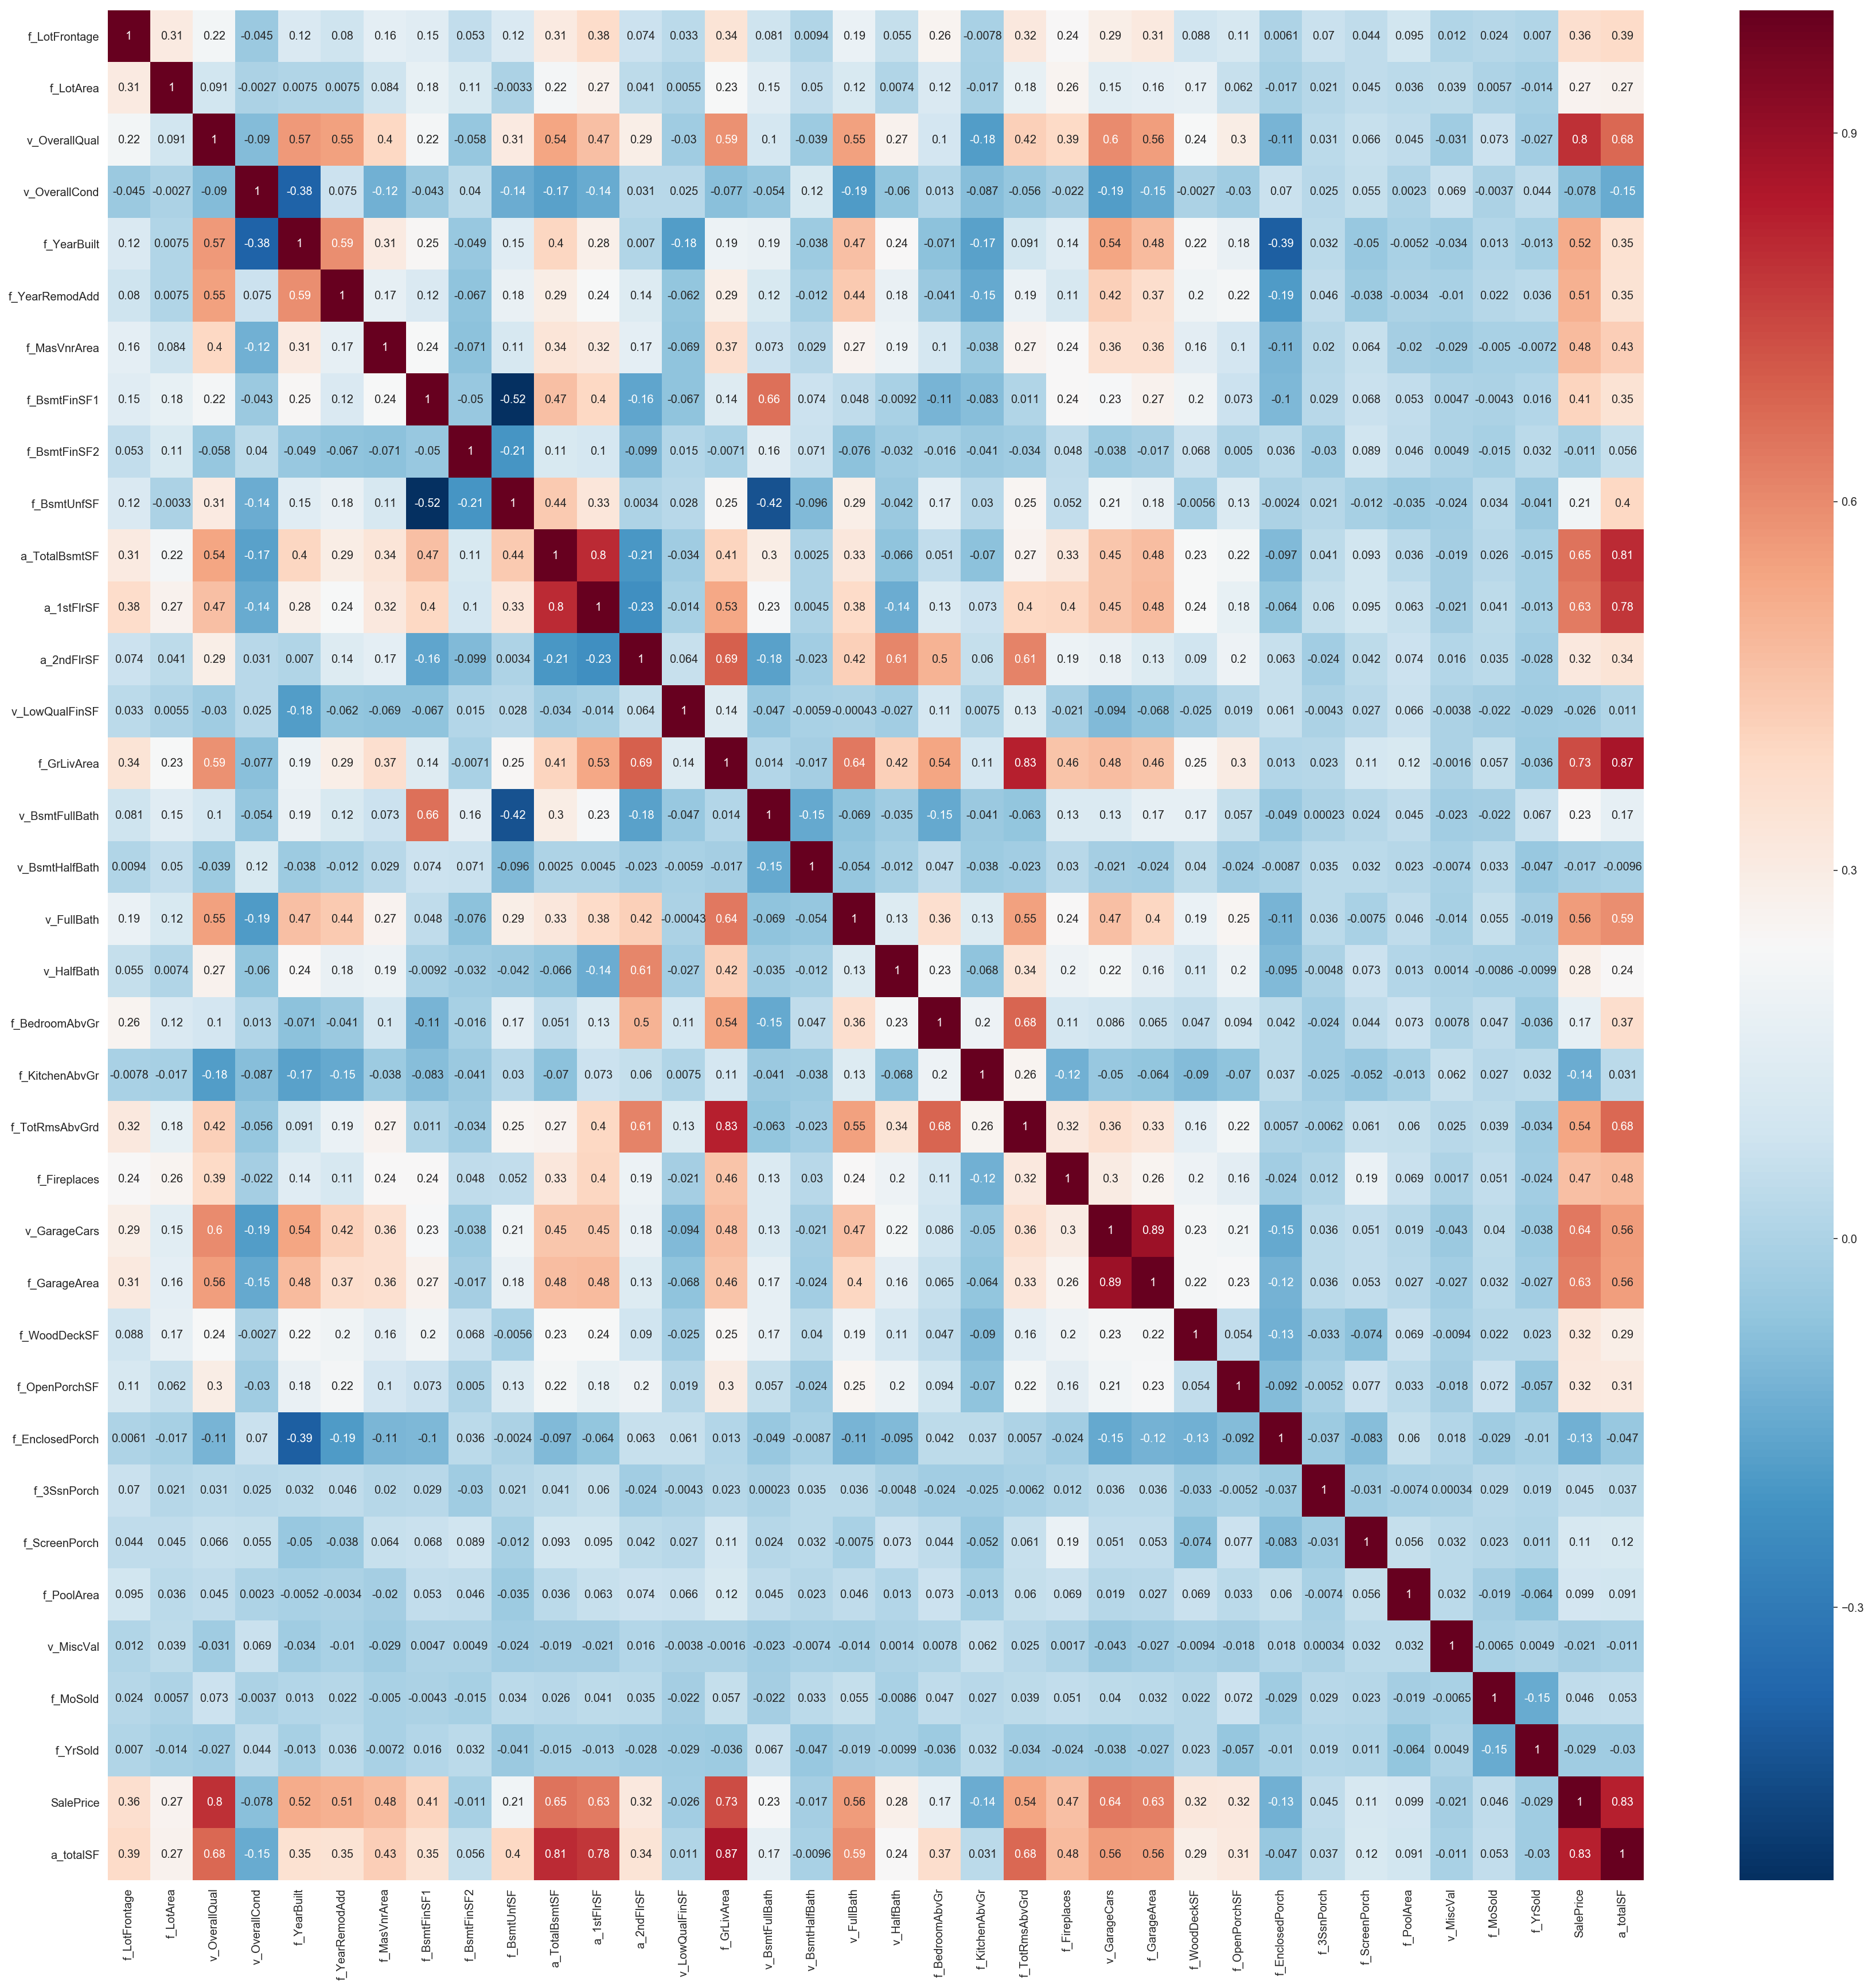

In [40]:
# have to plot a heatmap just for fun. But can't tell anything from that mess... 
plt.figure(figsize = (30,30))
sns.heatmap(house2.corr(),annot=True,cmap="RdBu_r")

<font color='green'>

# Q1: (B) MODELLING: PREPARATION


## Preparation stuff before we start modelling.. 
### (i) get_dummies for "fixed features"
### (ii) split the set into a train and test set + target column (fit transform training set and transform test set)
### (iii) apply standard scaler

</font>

In [41]:
fixed_col = [fixed_col for fixed_col in house2.columns if 'f_' in fixed_col or 'a_' in fixed_col]
fixed_col.append('SalePrice')
house_fixed = house2[fixed_col].copy()

In [42]:
house_fixed.shape

(1458, 46)

In [43]:
house_fixed.head()

,f_MSSubClass,f_MSZoning,f_LotFrontage,f_LotArea,f_Street,f_Alley,f_LotShape,f_LandContour,f_Utilities,f_LotConfig,...,f_EnclosedPorch,f_3SsnPorch,f_ScreenPorch,f_PoolArea,f_MoSold,f_YrSold,f_SaleType,f_SaleCondition,a_totalSF,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,2566,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,2524,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,2706,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,272,0,0,0,2,2006,WD,Abnorml,2473,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,3343,250000


<font color='green'>

### Q1: (B)(i) get_dummies for "fixed features"

</font>

In [44]:
house_fixed2 = pd.get_dummies(data=house_fixed,drop_first=True)
print(house_fixed2.shape)
house_fixed2.head()

(1458, 229)


,f_LotFrontage,f_LotArea,f_YearBuilt,f_YearRemodAdd,f_MasVnrArea,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,a_TotalBsmtSF,a_1stFlrSF,...,f_SaleType_ConLI,f_SaleType_ConLw,f_SaleType_New,f_SaleType_Oth,f_SaleType_WD,f_SaleCondition_AdjLand,f_SaleCondition_Alloca,f_SaleCondition_Family,f_SaleCondition_Normal,f_SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


<font color='green'>


### Q1: (B)(ii) split the set into a train and test set + target column (fit transform training set and transform test set)

</font>

In [45]:
test_set = house_fixed2[house_fixed2['f_YrSold']== 2010]
y_test = test_set['SalePrice']
X_test = test_set.drop('SalePrice', axis = 1)

train_set = house_fixed2[house_fixed2['f_YrSold'] < 2010]
y_train = train_set['SalePrice']
X_train = train_set.drop('SalePrice', axis = 1)
print(y_test.shape,X_test.shape)
print(y_train.shape,X_train.shape)
fixed_col_new = X_train.columns

(175,) (175, 228)
(1283,) (1283, 228)


<font color='green'>

### Q1: (B)(iii) apply standard scaler

</font>

In [46]:
# Scale the data!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = fixed_col_new
X_test.columns = fixed_col_new

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


<font color='green'>

# Q1: (C) MODELLING: LETS DO IT


## Lets go to the real stuff.. 
### (i) Try a simple Linear Regression
### (ii) Up the complexity, try a Lasso, Ridge, Elastic Net
### (iii) Up the complexity, try a Random Forest

</font>

<font color='green'>


### Q1: (C)(i) Try a simple Linear Regression


</font>

In [47]:
# Linear Regression -- 'baseline' model
lr = LinearRegression()
cross_val_score(lr, X_train, y_train, cv=5)

# this is super bad but kind of expected given that I have 200+ columns

array([-3.29054470e+22, -2.82177349e+25, -2.30252085e+23, -2.63971784e+24,
       -2.00620495e+22])

<font color='green'>



### Q1: (C)(ii) Up the complexity, try a Lasso


</font>

In [48]:
# lets tune some hyperparameters and see if we have better results

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
l_new = Lasso(alpha=optimal_lasso.alpha_)
l_new.fit(X_train, y_train)

scores = cross_val_score(l_new, X_train, y_train, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

scores are: [0.84652415 0.89486713 0.84994218 0.84163426 0.83156888]
mean: 0.852907321993948 std: 0.02187497898360698


In [49]:
y_pred = l_new.predict(X_test)
metrics.r2_score(y_test, y_pred)

# prediction is really good. Looks tough to beat... 

0.8854008198888245

In [50]:
# curious what are the important columns

lasso_coefs = pd.DataFrame({'variable':X_train.columns,'coef':l_new.coef_,'abs_coef':np.abs(l_new.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)


,variable,coef,abs_coef
25,a_totalSF,21669.484566,21669.484566
11,f_GrLivArea,21574.319858,21574.319858
5,f_BsmtFinSF1,9448.870931,9448.870931
2,f_YearBuilt,9187.243644,9187.243644
75,f_Neighborhood_NridgHt,8263.405392,8263.405392
3,f_YearRemodAdd,6804.521625,6804.521625
81,f_Neighborhood_StoneBr,6126.825522,6126.825522
13,f_KitchenAbvGr,-5988.781553,5988.781553
220,f_SaleType_New,5750.820576,5750.820576
1,f_LotArea,5456.061617,5456.061617


<font color='green'>

## top features from the lasso model are
(1) totalSF (total area by square feet) (ie total TotalBsmtSF + Total first floor and 2nd floor)

(2) GrLivArea: Above grade (ground) living area square feet

(3) BsmtFinSF1: Type 1 finished square feet

(4) YearBuilt: Original construction date

(5) Neighborhood in NridgHt

(6) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

</font>

<font color='green'>



### Q1: (C)(ii) Try a Ridge


</font>

In [51]:
np.arange(0.14, 0.16,0.001)

array([0.14 , 0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148,
       0.149, 0.15 , 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157,
       0.158, 0.159])

In [52]:
# ridge

alpha_range = np.linspace(0.145, 0.15, 100)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)

r_new = Ridge(alpha=ridgeregcv.alpha_)
r_new.fit(X_train, y_train)
scores = cross_val_score(r_new, X_train, y_train, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

#cross validated mean r2 is lower and std is higher

scores are: [0.82752234 0.8644613  0.80036667 0.79461184 0.81582983]
mean: 0.8205583947070973 std: 0.02481632610064173


In [53]:
# curious what are the important columns

ridge_coefs = pd.DataFrame({'variable':X_train.columns,'coef':r_new.coef_,'abs_coef':np.abs(r_new.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
11,f_GrLivArea,25781.360801,25781.360801
42,f_MSZoning_RL,15070.490752,15070.490752
111,f_MasVnrType_None,14590.085952,14590.085952
43,f_MSZoning_RM,11417.221179,11417.221179
211,f_GarageYrBlt_2008.0,11069.577513,11069.577513
110,f_MasVnrType_BrkFace,10541.308385,10541.308385
10,a_2ndFlrSF,10455.684928,10455.684928
29,f_MSSubClass_20,10053.169271,10053.169271
25,a_totalSF,9993.757388,9993.757388
209,f_GarageYrBlt_2006.0,9549.870591,9549.870591


<font color='green'>


## Top 5 features is different... and makes less sense... 

(1) GrLivArea: Above grade (ground) living area square feet

(2) MSZoning: Identifies the general zoning classification of the sale in Residential Low Density

(3) MasVnrType: Masonry veneer type = None. This doesnt make sense... 

(4) MSZoning_RM: Identifies the general zoning classification of the sale in Residential Medium Density

(5) GarageYrBlt_2008: Doesn't make a lot of sense too... 

</font>

<font color='green'>


### Q1: (C)(ii) Try a Elastic Net


</font>

In [54]:
# Lets look at elastic net

l1_ratios = np.linspace(0.95, 1.05, 10)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=30, cv=5, max_iter=100)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, X_train, y_train, cv=5)


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anac

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning:

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

66.40060429802669
0.9944444444444445


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1047: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)


In [55]:
print("scores are:", enet_scores)
print("mean:",np.mean(enet_scores), "std:",np.std(enet_scores))
# score is slightly lower than lasso and ridge but std is lower.


scores are: [0.84831609 0.88090623 0.83875505 0.84234666 0.81944841]
mean: 0.8459544893466205 std: 0.019973091801471252


<font color='green'>


### Q1: (C)(iii) Up the complexity, try a Random Forest

</font>

In [56]:
# Lets try more complex models.. Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

parameters = {
    'max_depth': [5, 6, 7],
    'n_estimators': (400, 500, 600),
}

gsc = GridSearchCV( estimator=RandomForestRegressor(), param_grid = parameters, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)

{'max_depth': 7, 'n_estimators': 400}


In [57]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
scores = cross_val_score(rfr, X_train, y_train, cv=5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

# Lasso edges random forest by a little bit 

scores are: [0.82272869 0.88554192 0.86424835 0.84826317 0.83518436]
mean: 0.8511932977127163 std: 0.022024386725028804


<font color='green'>

# Q1: (D) MODELLING: IN REAL LIFE

#### What I don't like about the model is that it is very not understandable... And cumbersome. I want to see if the 5 top features for lasso gives me a similar result... 

</font>



In [58]:
select_cols = ['a_totalSF', 'f_GrLivArea', 'f_BsmtFinSF1', 'f_YearBuilt', 'f_Neighborhood_NridgHt']

X_train2 = X_train[select_cols]

optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1)
optimal_lasso.fit(X_train2, y_train)
l_new = Lasso(alpha=optimal_lasso.alpha_)
l_new.fit(X_train2, y_train)

scores = cross_val_score(l_new, X_train2, y_train, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

# not too bad just from 5 features.. 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

scores are: [0.76735994 0.84595233 0.79501297 0.72353328 0.77982777]
mean: 0.782337259566186 std: 0.03973934038475926


.....................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished


<font color='green'>

#### Not too bad result and alot more understandable.. 

</font>


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

<font color='green'>



# Q2: 

# (A) INTEPRETING THE QUESTION

### Seems like the question is asking to extract the difference in y_train vs y_predict and then using the variable / renovatable factors to predict that.  
### (i) Lets get the difference between y_train and y_predict 
### (ii) Lets do the same getting dummies, splitting and scaling for these variable features
### (iii) Lets do some MODELLING!


</font>

In [59]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
l_new = Lasso(alpha=optimal_lasso.alpha_)
l_new.fit(X_train, y_train)

scores = cross_val_score(l_new, X_train, y_train, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

scores are: [0.84652415 0.89486713 0.84994218 0.84163426 0.83156888]
mean: 0.852907321993948 std: 0.02187497898360698


In [60]:
y_pred = l_new.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.8854008198888245

<font color='green'>


### Q2: (A)(i) Lets get the difference between y_train and y_predict 


</font>

In [61]:
y_pred_train = l_new.predict(X_train)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['y_pred_train']
y_pred_train['train_less_predict'] = y_train.values - y_pred_train['y_pred_train']
print(y_pred_train.isnull().sum())
y_pred_train.head()

y_pred_train          0
train_less_predict    0
dtype: int64


,y_pred_train,train_less_predict
0,206608.610721,1891.389279
1,186904.054328,-5404.054328
2,218675.183222,4824.816778
3,171574.274423,-31574.274423
4,291583.094705,-41583.094705


(1283,)


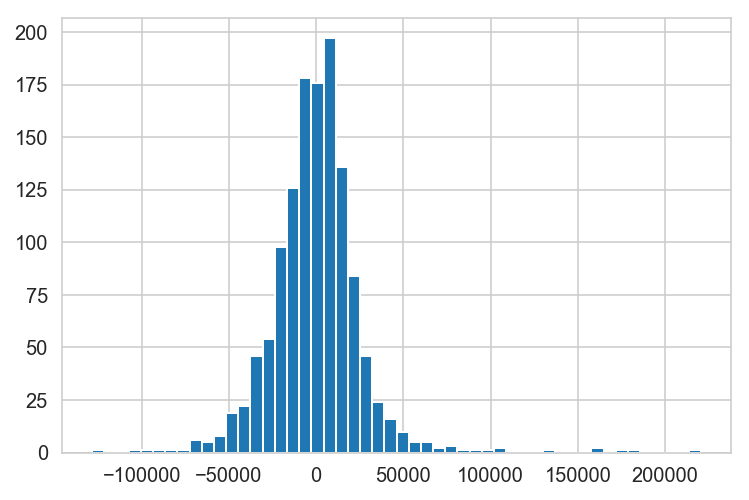

In [62]:
y_train_less_predict = y_pred_train['train_less_predict']
y_train_less_predict.hist(bins=50)
print(y_train_less_predict.shape)

y_pred_test          0
test_less_predict    0
dtype: int64
(175,)


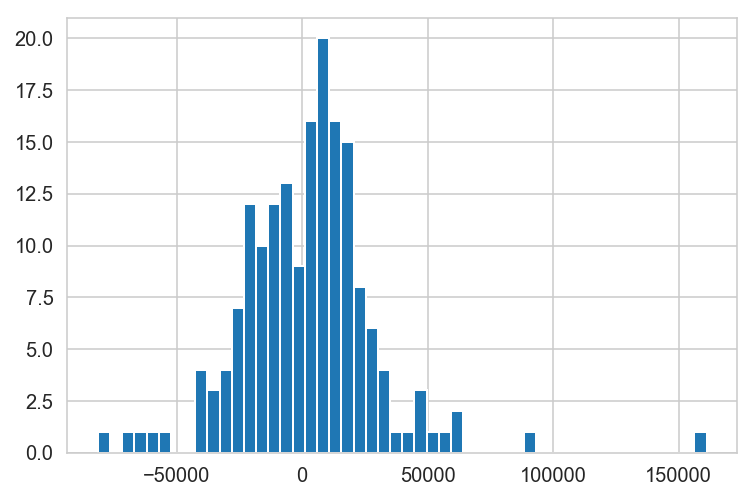

In [63]:
y_pred_test = l_new.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test.columns = ['y_pred_test']
y_pred_test['test_less_predict'] = y_test.values - y_pred_test['y_pred_test']
print(y_pred_test.isnull().sum())
y_pred_test.head()
y_test_less_predict = y_pred_test['test_less_predict']
y_test_less_predict.hist(bins=50)
print(y_test_less_predict.shape)

<font color='green'>


### Q2: (A)(ii) Lets do the same getting dummies, splitting (getting holdout set) and scaling for these variable features


</font>

In [64]:
var_col = [var_col for var_col in house2.columns if 'v_' in var_col]
var_col.append('f_YrSold')
house_var = house2[var_col].copy()
house_var.shape

(1458, 36)

In [65]:
house_var2 = pd.get_dummies(data=house_var,drop_first=True)
print(house_var2.shape)
house_var2.head()

(1458, 141)


,v_OverallQual,v_OverallCond,v_LowQualFinSF,v_BsmtFullBath,v_BsmtHalfBath,v_FullBath,v_HalfBath,v_GarageCars,v_MiscVal,f_YrSold,...,v_PoolQC_Gd,v_PoolQC_None,v_Fence_GdWo,v_Fence_MnPrv,v_Fence_MnWw,v_Fence_None,v_MiscFeature_None,v_MiscFeature_Othr,v_MiscFeature_Shed,v_MiscFeature_TenC
0,7,5,0,1,0,2,1,2,0,2008,...,0,1,0,0,0,1,1,0,0,0
1,6,8,0,0,1,2,0,2,0,2007,...,0,1,0,0,0,1,1,0,0,0
2,7,5,0,1,0,2,1,2,0,2008,...,0,1,0,0,0,1,1,0,0,0
3,7,5,0,1,0,1,0,3,0,2006,...,0,1,0,0,0,1,1,0,0,0
4,8,5,0,1,0,2,1,3,0,2008,...,0,1,0,0,0,1,1,0,0,0


In [66]:
X_test2 = house_var2[house_var2['f_YrSold']== 2010]
X_train2 = house_var2[house_var2['f_YrSold'] < 2010]

print(y_test_less_predict.shape,X_test2.shape)
print(y_train_less_predict.shape,X_train2.shape)
var_col_new = X_train2.columns

(175,) (175, 141)
(1283,) (1283, 141)


In [67]:
# Scale the data!
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)
X_train2.columns = var_col_new
X_test2.columns = var_col_new

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [68]:
X_train2.head()

,v_OverallQual,v_OverallCond,v_LowQualFinSF,v_BsmtFullBath,v_BsmtHalfBath,v_FullBath,v_HalfBath,v_GarageCars,v_MiscVal,f_YrSold,...,v_PoolQC_Gd,v_PoolQC_None,v_Fence_GdWo,v_Fence_MnPrv,v_Fence_MnWw,v_Fence_None,v_MiscFeature_None,v_MiscFeature_Othr,v_MiscFeature_Shed,v_MiscFeature_TenC
0,0.645805,-0.512866,-0.125231,1.140128,-0.253009,0.784410,1.224338,0.297618,-0.076307,0.428094,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.16991,-0.027929
1,-0.077204,2.194982,-0.125231,-0.799904,3.754527,0.784410,-0.761535,0.297618,-0.076307,-0.460652,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.16991,-0.027929
2,0.645805,-0.512866,-0.125231,1.140128,-0.253009,0.784410,1.224338,0.297618,-0.076307,0.428094,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.16991,-0.027929
3,0.645805,-0.512866,-0.125231,1.140128,-0.253009,-1.032193,-0.761535,1.628086,-0.076307,-1.349397,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.16991,-0.027929
4,1.368813,-0.512866,-0.125231,1.140128,-0.253009,0.784410,1.224338,1.628086,-0.076307,0.428094,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.16991,-0.027929


In [69]:
X_test2.head()

,v_OverallQual,v_OverallCond,v_LowQualFinSF,v_BsmtFullBath,v_BsmtHalfBath,v_FullBath,v_HalfBath,v_GarageCars,v_MiscVal,f_YrSold,...,v_PoolQC_Gd,v_PoolQC_None,v_Fence_GdWo,v_Fence_MnPrv,v_Fence_MnWw,v_Fence_None,v_MiscFeature_None,v_MiscFeature_Othr,v_MiscFeature_Shed,v_MiscFeature_TenC
0,-0.077204,1.292366,-0.125231,1.140128,-0.253009,-1.032193,-0.761535,0.297618,1.295961,2.205586,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,-5.574495,-0.027929,5.885481,-0.027929
1,-0.800212,2.194982,-0.125231,1.140128,-0.253009,-1.032193,-0.761535,-1.032849,-0.076307,2.205586,...,-0.039513,0.068546,-0.201374,2.990942,-0.092994,-2.079339,0.179388,-0.027929,-0.169910,-0.027929
2,-0.800212,1.292366,-0.125231,-0.799904,3.754527,-1.032193,-0.761535,0.297618,-0.076307,2.205586,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.169910,-0.027929
3,1.368813,-0.512866,-0.125231,1.140128,-0.253009,0.784410,-0.761535,1.628086,-0.076307,2.205586,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.169910,-0.027929
4,-0.800212,-0.512866,-0.125231,-0.799904,3.754527,-1.032193,1.224338,0.297618,-0.076307,2.205586,...,-0.039513,0.068546,-0.201374,-0.334343,-0.092994,0.480922,0.179388,-0.027929,-0.169910,-0.027929


<font color='green'>


### Q2: (A)(iii) Lets do some MODELLING!


</font>

In [70]:
#print(y_test_less_predict.shape,X_test2.shape)
#print(y_train_less_predict.shape,X_train2.shape)
optimal_lasso2 = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso2.fit(X_train2, y_train_less_predict)
l_new2 = Lasso(alpha=optimal_lasso2.alpha_)
l_new2.fit(X_train2, y_train_less_predict)

scores = cross_val_score(l_new2, X_train2, y_train_less_predict, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

scores are: [0.20656169 0.23452088 0.2153362  0.11099179 0.18601098]
mean: 0.1906843061487256 std: 0.042788291343736705


In [71]:
# lasso scores are not good... can we improve them.. 

In [72]:
# ridge

alpha_range = np.linspace(0.01, 1000, 100)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train2, y_train_less_predict)

r_new2 = Ridge(alpha=ridgeregcv.alpha_)
r_new2.fit(X_train2, y_train_less_predict)
scores = cross_val_score(r_new2, X_train2, y_train_less_predict, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

#cross validated mean r2 is lower and std is higher

scores are: [-0.11753023 -0.07512843  0.07598837  0.08615124  0.08963725]
mean: 0.011823638934313752 std: 0.08943125942214636


<font color='green'>


### Q2: (A)(iii) The result is really bad and this approach to look at the residuals seperately is something that I don't quite like. Thinking how to improve this. 

My feel is that both renovatable / variable factors and fixed factors contribute to the price of a house
and hypothesis is if we combine both, we will (a) be able to have a better prediction of houses (b) be able to identify houses that have lower quality and make money as long as the cost of improvement of quality < increase in house price after renovation. This approach will help to also target point 3 to "Evaluate the mean dollar value of different renovations"



</font>

<font color='green'>



# Q2: (B) AN ALTERNATIVE APPROACH

### (i) Lets get a model with all the features (both fixed and variable) + model + test 
### (ii) Then extract the features that have the highest coeffecients 
### (iii) Intepret these coeffecients


</font>

<font color='green'>



### Q2: (B)(i) Lets get a model with all the features (both fixed and variable) + model + test 


</font>

In [73]:
house_full = house2.copy()
house_full.shape
house_full2 = pd.get_dummies(data=house_full,drop_first=True)
print(house_full2.shape)
house_full2.head()


(1458, 369)


,f_LotFrontage,f_LotArea,v_OverallQual,v_OverallCond,f_YearBuilt,f_YearRemodAdd,f_MasVnrArea,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,...,f_SaleType_ConLI,f_SaleType_ConLw,f_SaleType_New,f_SaleType_Oth,f_SaleType_WD,f_SaleCondition_AdjLand,f_SaleCondition_Alloca,f_SaleCondition_Family,f_SaleCondition_Normal,f_SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [74]:
test_fset = house_full2[house_full2['f_YrSold']== 2010]
y_ftest = test_fset['SalePrice']
X_ftest_org = test_fset.drop('SalePrice', axis = 1)
X_ftest = test_fset.drop('SalePrice', axis = 1)

ftrain_set = house_full2[house_full2['f_YrSold'] < 2010]
y_ftrain = ftrain_set['SalePrice']
X_ftrain_org = ftrain_set.drop('SalePrice', axis = 1)
X_ftrain = ftrain_set.drop('SalePrice', axis = 1)
print(y_ftest.shape,X_ftest_org.shape)
print(y_ftrain.shape,X_ftrain_org.shape)
full_col_new = X_ftrain_org.columns
print(full_col_new)

(175,) (175, 368)
(1283,) (1283, 368)
Index(['f_LotFrontage', 'f_LotArea', 'v_OverallQual', 'v_OverallCond',
       'f_YearBuilt', 'f_YearRemodAdd', 'f_MasVnrArea', 'f_BsmtFinSF1',
       'f_BsmtFinSF2', 'f_BsmtUnfSF',
       ...
       'f_SaleType_ConLI', 'f_SaleType_ConLw', 'f_SaleType_New',
       'f_SaleType_Oth', 'f_SaleType_WD', 'f_SaleCondition_AdjLand',
       'f_SaleCondition_Alloca', 'f_SaleCondition_Family',
       'f_SaleCondition_Normal', 'f_SaleCondition_Partial'],
      dtype='object', length=368)


In [75]:
# Scale the data!
scaler = StandardScaler()
X_ftrain = scaler.fit_transform(X_ftrain)
X_ftest = scaler.transform(X_ftest)
X_ftrain = pd.DataFrame(X_ftrain)
X_ftest = pd.DataFrame(X_ftest)
X_ftrain.columns = full_col_new
X_ftest.columns = full_col_new
print(y_ftest.shape,X_ftest.shape)
print(y_ftrain.shape,X_ftrain.shape)


(175,) (175, 368)
(1283,) (1283, 368)


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [76]:
X_ftrain.head()

,f_LotFrontage,f_LotArea,v_OverallQual,v_OverallCond,f_YearBuilt,f_YearRemodAdd,f_MasVnrArea,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,...,f_SaleType_ConLI,f_SaleType_ConLw,f_SaleType_New,f_SaleType_Oth,f_SaleType_WD,f_SaleCondition_AdjLand,f_SaleCondition_Alloca,f_SaleCondition_Family,f_SaleCondition_Normal,f_SaleCondition_Partial
0,-0.247447,-0.199442,0.645805,-0.512866,1.044744,0.881023,0.505265,0.621122,-0.284497,-0.943962,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
1,0.448420,-0.087153,-0.077204,2.194982,0.156338,-0.427031,-0.567244,1.249276,-0.284497,-0.643873,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
2,-0.108274,0.073957,0.645805,-0.512866,0.978936,0.832576,0.319218,0.113056,-0.284497,-0.307953,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
3,-0.479403,-0.092036,0.645805,-0.512866,-1.850801,-0.717710,-0.567244,-0.510480,-0.284497,-0.070569,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,-2.090024,-0.315278
4,0.633984,0.367861,1.368813,-0.512866,0.946033,0.735684,1.347951,0.503343,-0.284497,-0.182542,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278


In [77]:
X_ftest.head()

,f_LotFrontage,f_LotArea,v_OverallQual,v_OverallCond,f_YearBuilt,f_YearRemodAdd,f_MasVnrArea,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,...,f_SaleType_ConLI,f_SaleType_ConLw,f_SaleType_New,f_SaleType_Oth,f_SaleType_WD,f_SaleCondition_AdjLand,f_SaleCondition_Alloca,f_SaleCondition_Family,f_SaleCondition_Normal,f_SaleCondition_Partial
0,0.284305,0.073078,-0.077204,1.292366,-0.041085,-0.717710,0.417713,0.325520,-0.284497,-0.325868,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
1,0.190369,-0.219362,-0.800212,2.194982,-0.106893,0.784130,-0.567244,-0.575143,4.013673,-0.823031,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
2,-0.479403,-0.321496,-0.800212,1.292366,-0.666259,0.735684,-0.567244,-0.468911,2.842615,-0.876778,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
3,1.283460,0.096219,1.368813,-0.512866,1.176360,1.123255,0.527153,1.803530,-0.284497,-0.191500,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278
4,-0.015492,0.005802,-0.800212,-0.512866,-0.403028,-1.250621,-0.567244,1.341651,-0.284497,-0.428884,...,-0.055924,-0.062549,-0.310775,-0.048412,0.400045,-0.055924,-0.092994,-0.119286,0.478463,-0.315278


In [78]:
# lets tune some hyperparameters and see if we have better results

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_ftrain, y_ftrain)
l_newf = Lasso(alpha=optimal_lasso.alpha_)
l_newf.fit(X_ftrain, y_ftrain)

scores = cross_val_score(l_newf, X_ftrain, y_ftrain, cv = 5)
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

scores are: [0.90037888 0.91782231 0.89150586 0.88442743 0.88224284]
mean: 0.8952754634562125 std: 0.012931700026011498


In [79]:
y_fpred = l_newf.predict(X_ftest)
metrics.r2_score(y_ftest, y_fpred)

# really really good scores and std

0.9068359039826623

<font color='green'>

### Q2: (B)(ii) Then extract the features that have the highest coeffecients 

</font>

In [80]:
# curious what are the important columns

flasso_coefs = pd.DataFrame({'variable':X_ftrain.columns,'coef':l_newf.coef_,'abs_coef':np.abs(l_newf.coef_)})

flasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

feature_top30 = flasso_coefs.head(30)
feature_top30

,variable,coef,abs_coef
34,a_totalSF,19305.562070,19305.562070
14,f_GrLivArea,17002.771051,17002.771051
2,v_OverallQual,12818.319661,12818.319661
4,f_YearBuilt,7826.650273,7826.650273
175,v_BsmtQual_Gd,-7698.715440,7698.715440
7,f_BsmtFinSF1,7113.158037,7113.158037
3,v_OverallCond,5971.591784,5971.591784
177,v_BsmtQual_TA,-5842.289639,5842.289639
84,f_Neighborhood_NridgHt,4910.921006,4910.921006
83,f_Neighborhood_NoRidge,4874.244771,4874.244771


<font color='green'>

### Q2: (B)(iii) Intepret these coeffecients

</font>

In [81]:
for i, r in feature_top30.iterrows():
    if 'v_' in (r['variable']):
        print("ok")
    else:
        feature_top30.drop(i, axis = 0, inplace = True)

feature_var = feature_top30

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [82]:
feature_var

,variable,coef,abs_coef
2,v_OverallQual,12818.319661,12818.319661
175,v_BsmtQual_Gd,-7698.715440,7698.715440
3,v_OverallCond,5971.591784,5971.591784
177,v_BsmtQual_TA,-5842.289639,5842.289639
213,v_KitchenQual_Gd,-4450.125724,4450.125724
182,v_BsmtExposure_Gd,4243.925973,4243.925973
129,v_RoofMatl_WdShngl,3959.087150,3959.087150
214,v_KitchenQual_TA,-3789.279159,3789.279159
23,v_GarageCars,3052.027498,3052.027498
220,v_Functional_Typ,2828.839348,2828.839348


In [97]:
mean = []
std = []
for i, row in feature_var.iterrows():
    mean.append(np.mean(X_ftrain_org[row["variable"]]))
    std.append(np.std(X_ftrain_org[row["variable"]]))
feature_var['mean'] = mean
feature_var['std'] = std
feature_var['coef/std'] = feature_var['coef'] / feature_var['std']
feature_var.sort_values('coef/std', ascending = False)

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,variable,coef,abs_coef,mean,std,coef*std,coef/std
129,v_RoofMatl_WdShngl,3959.087150,3959.087150,0.004677,0.068225,270.109264,58029.742619
182,v_BsmtExposure_Gd,4243.925973,4243.925973,0.094310,0.292260,1240.328985,14521.072944
132,v_Exterior1st_BrkFace,2132.436895,2132.436895,0.031956,0.175884,375.061303,12124.116979
220,v_Functional_Typ,2828.839348,2828.839348,0.932970,0.250075,707.420969,11311.980293
2,v_OverallQual,12818.319661,12818.319661,6.106781,1.383110,17729.148408,9267.750213
3,v_OverallCond,5971.591784,5971.591784,5.568200,1.107891,6615.871774,5390.054350
23,v_GarageCars,3052.027498,3052.027498,1.776306,0.751615,2293.950874,4060.623947
164,v_ExterQual_TA,-2167.007182,2167.007182,0.618083,0.485856,-1052.854428,-4460.179870
214,v_KitchenQual_TA,-3789.279159,3789.279159,0.505066,0.499974,-1894.542318,-7578.947384
213,v_KitchenQual_Gd,-4450.125724,4450.125724,0.399065,0.489706,-2179.253709,-9087.339796


In [84]:
print(house_full['v_KitchenQual'].value_counts())
print(house_full['v_BsmtQual'].value_counts())

TA    735
Gd    586
Ex     98
Fa     39
Name: v_KitchenQual, dtype: int64
TA      649
Gd      618
Ex      119
None     37
Fa       35
Name: v_BsmtQual, dtype: int64


<font color='green'>


# (C) CONCLUSION

### Using the table above, the company can decide if they want to upgrade some of the areas of the house

For example 

(a) Roof Material is the top attribute that if changed can have the biggest impact on price. However, std deviaition is small and would not recommend to use this. 

(b) Consider improving Bsmt Exposure (walkout or garden level walls) and Exterior1st (exterior covering the house)

(c) Functionality for the house should at least be typical

(d) On overall quality, this is one of the most important metric. An improvement by 1 unit will imrpove the house by on average $9268! Kind of expected, is the renovation works that the company is able to do able to increase the quality?

(e) On overall condition, improvement by 1 unit will improve the house by on average $5390! Can the company improve the condition of the house?

(f) Consider improving the quality of Kitchen Quality, Basement Quality and Exterior Quality.   

# This makes better sense that what I did for (A)

</font>


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [85]:
house2.head()

,f_MSSubClass,f_MSZoning,f_LotFrontage,f_LotArea,f_Street,f_Alley,f_LotShape,f_LandContour,f_Utilities,f_LotConfig,...,v_PoolQC,v_Fence,v_MiscFeature,v_MiscVal,f_MoSold,f_YrSold,f_SaleType,f_SaleCondition,SalePrice,a_totalSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000,3343


In [86]:
house2.shape

(1458, 81)

<font color='green'>



# Q3: 

# (A) SIMPLE APPROACH...
### (i) Lets see what  is our baseline
### (ii) Lets do the same getting dummies, splitting and scaling for these variable features
### (iii) Lets do some MODELLING using logregression and then change it if required. If this is no good, will try out Edo's approach to rebalance and even out the train dataset


</font>

<font color='green'>

### Q3: (A)(i) Lets see what  is our baseline

</font>

In [87]:
house2['f_SaleCondition'].value_counts()
print(101/house2['f_SaleCondition'].count())
# only about 7% of the data that we have is for abnormal sales... How do we predict? 

0.06927297668038408


<font color='green'>

### Q3: (A)(ii) Lets do the same getting dummies, splitting and scaling for these variable features

</font>

In [88]:
house_log = house2.copy()
house_log.shape
house_log2 = pd.get_dummies(data=house_log,drop_first=True)
print(house_log2.shape)
house_log2.head()


(1458, 369)


,f_LotFrontage,f_LotArea,v_OverallQual,v_OverallCond,f_YearBuilt,f_YearRemodAdd,f_MasVnrArea,f_BsmtFinSF1,f_BsmtFinSF2,f_BsmtUnfSF,...,f_SaleType_ConLI,f_SaleType_ConLw,f_SaleType_New,f_SaleType_Oth,f_SaleType_WD,f_SaleCondition_AdjLand,f_SaleCondition_Alloca,f_SaleCondition_Family,f_SaleCondition_Normal,f_SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [89]:
# adding target column back to dataframe. This is what we are trying to predict. This was lost when i dropped the first column of SaleCondition when I used get_dummies
house_log_y = pd.get_dummies(data=house_log['f_SaleCondition'])
house_log2['Abnorml'] = house_log_y['Abnorml']

In [90]:
print(house_log[house_log['f_YrSold'] == 2010]['f_SaleCondition'].value_counts())
# total abnorml for 2010 is 11/175 = 6.3% similar to the overall 7% from the entire dataset. 
#Will split the train and test data in the same way with the hypothesis that previous year's data can be used to model and predict future abnormal sales


Normal     154
Abnorml     11
Partial      7
Family       2
Alloca       1
Name: f_SaleCondition, dtype: int64


In [91]:
test_set_log = house_log2[house_log2['f_YrSold'] == 2010]
y_testlog = test_set_log['Abnorml']
X_testlog = test_set_log.drop('Abnorml', axis = 1)

train_set_log = house_log2[house_log2['f_YrSold'] < 2010]
y_trainlog = train_set_log['Abnorml']
X_trainlog = train_set_log.drop('Abnorml', axis = 1)

print(y_testlog.shape,X_testlog.shape)
print(y_trainlog.shape,X_trainlog.shape)
log_col_new = X_trainlog.columns
print(log_col_new)

(175,) (175, 369)
(1283,) (1283, 369)
Index(['f_LotFrontage', 'f_LotArea', 'v_OverallQual', 'v_OverallCond',
       'f_YearBuilt', 'f_YearRemodAdd', 'f_MasVnrArea', 'f_BsmtFinSF1',
       'f_BsmtFinSF2', 'f_BsmtUnfSF',
       ...
       'f_SaleType_ConLI', 'f_SaleType_ConLw', 'f_SaleType_New',
       'f_SaleType_Oth', 'f_SaleType_WD', 'f_SaleCondition_AdjLand',
       'f_SaleCondition_Alloca', 'f_SaleCondition_Family',
       'f_SaleCondition_Normal', 'f_SaleCondition_Partial'],
      dtype='object', length=369)


<font color='green'>

### Q3: (A)(iii) Lets do some MODELLING using logregression and then change it if required. If this is no good, will try out Edo's approach to rebalance and even out the train dataset


</font>

In [92]:
# Let's see how good/bad a simple LogisticRegression model does? Using gridsearch to predict 

lr = LogisticRegression()
lr.fit(X_trainlog, y_trainlog)
print(lr.score(X_testlog, y_testlog)) #baseline

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,5)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(X_trainlog, y_trainlog)
print(lr_gridsearch.best_params_)
#best_lr = lr_gridsearch.best_estimator_
#best_lr.score(X_test, y_test)

0.9371428571428572
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.5s finished


In [93]:
# cross_val_score the optimal model and score it with auc

scores = cross_val_score(lr_gridsearch, X_trainlog, y_trainlog, cv = 5,scoring = 'roc_auc')
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
scores are: [1.         0.9967457  1.         0.99976657 1.        ]
mean: 0.9993024545941112 std: 0.0012815701828504924


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


<font color='green'>

### Omg... AUC is 0.999 and std is 0.001... Maybe it is overfitting using train data and if I use the holdoutset it will be bad? 

</font>

In [94]:
y_pred = lr_gridsearch.predict(X_testlog)
metrics.roc_auc_score(y_testlog, y_pred)

1.0

In [95]:
metrics.confusion_matrix(y_testlog, y_pred)

array([[164,   0],
       [  0,  11]])

<font color='green'>

### AUC is 1 and confusion matrix shows no false negative and no false positive!!!

</font>

<font color='green'>

# CONCLUSION

### I really wanted to rebalance the data like what Edo said but with this kind of results, why bother... 

### Unexpected end to Q3... Model is close to PERFECTION! 

</font>